# Assignment 1: Classifying handwritten digits using probability theory

### Goals of the exercise

- To build a simple classifier for MNIST digits using the material on discrete probability theory from lecture #1.

- Get comfortable with discrete probabilities

- Get comfortable with representing images as matrices

This Notebook is based on a notebook from lecture #1.

# Table of Contents
1. [Theory](#Theory)
2. [Code for all digits](#Implementing-Bayes's-theorem)
3. [10 Fold Cross validation](#10-Fold-Cross-validation)
4. [Confusion Matrix](#Confusion-matrix)
5. [Error analysis](#Error-Analysis)


## Theory

Assume we have a collection of images of handwritten digits: zeros through 9. Let $\textbf{x}_n \in \mathbb{R}^D$ be a $D$-dimensional vector representation of the $n$'th image and let $y_n \in \left\lbrace 0, 9\right\rbrace$ be the corresponding label indicating which number the image is. Each of our images consists $28 \times 28$ binary pixels, i.e. a total of $28^2 = 784$ pixels. Thus, each image is represented using a $D = 784$ dimensional vector.

Assume we have a dataset of $N$ such image-label pairs, i.e. $\mathcal{D} = \left\lbrace (\textbf{x}_n, y_n) \right\rbrace_{n=1}^N$

We will use Bayes' theorem to construct a classifier as follows. Let $\textbf{x}^*$ be a new image to be classified, then our goal is to compute the following 10 probabilities,

$$
\mathbb{P}\left(Y = 0| \textbf{X} =\textbf{x}^*\right)\quad\text{through}\quad\mathbb{P}\left(Y = ... |  \textbf{X} =\textbf{x}^*\right)\quad\text{to}\quad\mathbb{P}\left(Y = 9 |  \textbf{X} =\textbf{x}^*\right).
$$

That is, the probability of the digit being a number from 0 to 9 after seeing the image. 



We can now use Bayes' rule to write the probability of interest as follows:

$$\mathbb{P}\left(Y = 1 |  \textbf{X} =\textbf{x}^*\right) = \frac{\mathbb{P}\left( \textbf{X} =\textbf{x}^*\right|Y = 1)\mathbb{P}\left(Y = 1\right)}{\mathbb{P}\left( \textbf{X} =\textbf{x}^*\right)}.\tag{1}$$

Let $x^*_{1}, x^*_{2}, \dots, x^*_{784}$ denote all the $784$ binary pixel values in the image $\textbf{x}^* = \left[x^*_{1}, x^*_{2}, \dots, x^*_{784}\right]$. Then we can re-write eq. (1) as follows

$$\mathbb{P}\left(Y = 1 |  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right) = \frac{\mathbb{P}\left(  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y = 1\right)\mathbb{P}\left(Y = 1\right)}{\mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right)}.\tag{2}$$

This equation expresses the probability that the image contains the digit '1' given that the image, $\textbf{x}^*$, consists of the pixel values specificied by $x^*_{1}, x^*_{2}, \dots, x^*_{784}$. 

As we have seen in the lecture, eq. (1) is intractable because we would need to evaluate $2^{784}$ values, so instead we will approximate using a Naı̈ve-Bayes approximation:

$$\mathbb{P}\left(  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y = 1\right) \approx \prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = 1\right).\tag{3}$$

This is done for all ten numbers

To use Bayes' theorem for classification, we need to compute the three components on the right hand side. Let's set  the terminology first:

- The factor $\mathbb{P}\left(Y=1\right)$ is **prior** probability of seeing an image of the digit '1'.  


- The factor $\mathbb{P}\left(  X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y = 1\right)$ is the **likelihood** of seeing the specific combination of pixels given the image contains the digit '1'.


- The denominator $\mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right)$ is the **evidence** or **marginal likelihood**, i.e. the probability of seeing this specific pixel combination across all labels.

Now, we will derive the corresponding approximation for the denominator, i.e. the evidence. For all 10 numbers we have

$\begin{align}
\mathbb{P}\left( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}\right) &\stackrel{(a)}{=} \sum_{n=0}^{9}\left( \mathbb{P}( X_1 = x^*_{1}, X_2 = x^*_{2}, \dots, X_{784} = x^*_{784}|Y=n)\mathbb{P}(Y=n) \right)\\
%
&\stackrel{(b)}{\approx} \sum_{n=0}^{9}\left(\prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = n\right)\mathbb{P}(Y=n)\right)\\
%
&\stackrel{(c)}{=} \sum_{n=0}^{9}\left( \mathbb{P}(Y=n)\prod_{i=1}^{784}\mathbb{P}\left(  X_i = x^*_{i}|Y = n\right) \right). \tag{4}\\
\end{align}$

In the derivation above, we have used the following three properties:

1) The Naı̈ve-Bayes assumption  

2) The law of total probability  

3) The basic multiplication properties of real numbers  


### Loading the data

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from sklearn.metrics import confusion_matrix

np.random.seed(0)

In [3]:
# load data
data = np.load('mnist_bin.npz')

# get vector representation of binary digits
X = data['X']

# get binary labels
y = data['y']

print('The shape of X is (%d, %d)' % X.shape)
print('The shape of y is (%d)\n' % y.shape)

# Dimensions
N, D = X.shape

print('Number of images: %d' % N)
print('Number of pixels: %d' % D)

The shape of X is (70000, 784)
The shape of y is (70000)

Number of images: 70000
Number of pixels: 784


### Representing images using vectors

An image from the MNIST dataset consists of $28 \times 28$ pixels and is naturally represented as a $28 \times 28$ matrix. This representation makes it easy for us to plot and visualize the image. However, in signal processing and machine learning, it is usually more convenient to represent data as vectors rather than matrices. This makes it possible for us to use the tools from our machine learning toolbox on many different types of data. Therefore, we use a vector representation for the images in this notebook. 

To go from the matrix representation to the vector representation, we basically take all the $28$ columns in the image matrix and stack them on top of each other. The result is a $28^2 = 784$ dimensional vector. Similarly, if we want to go from the image vector representation to the image matrix representation, we take the $784$ dimensional vector and divide it into $28$ smaller $28$ dimensional vectors and stack them side by side to form a $28 \times 28$ matrix.

As shown above, the matrix $\mathbf{X}$ is matrix with $70.000$ rows and $784$ columns. Each row corresponds to a separate image and each column corresponds to a specific pixel. That is, $X_{i,j}$, refers to the $j$'th pixel in the $i$'th image and each image is a now vector in $\mathbb{R}^{784}$.

The function show_image will take a $784$-dimensional vector and reshape it into a $28\times28$ matrix before plotting it.

In [4]:
def show_image(x, title="", clim=None, cmap=plt.cm.gray, colorbar=False):
    ax = plt.gca()
    im = ax.imshow(x.reshape((28, 28)), cmap=cmap, clim=clim)
    
    if len(title) > 0:
        plt.title(title)
        
    plt.axis('off')
    
    if colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

### Let's inspect some numbers

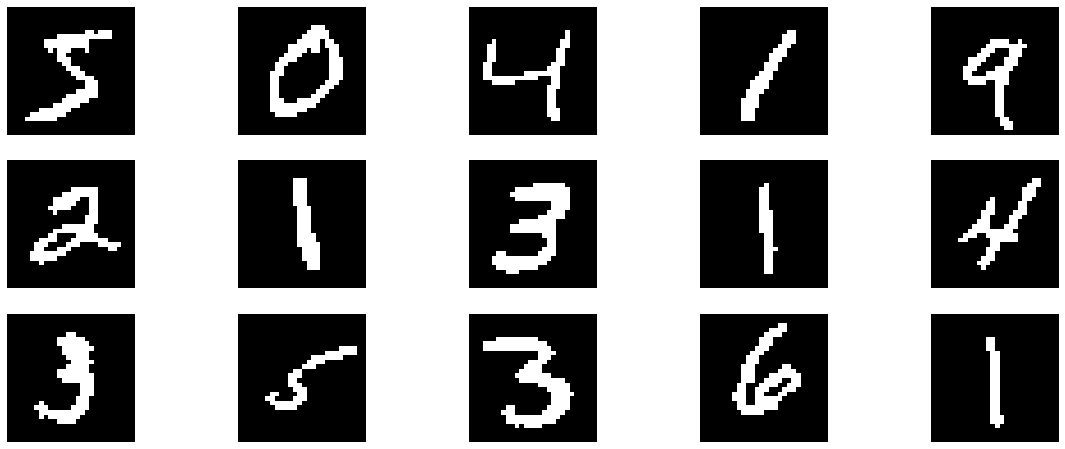

In [5]:
num_images_per_row = 5
num_rows = 3
num_images = num_images_per_row * num_rows

plt.figure(figsize=(20, 8))
for i in range(num_images):
    plt.subplot(num_rows, num_images_per_row, 1 + i)
    show_image(X[i, :])

### Another way to visualize a binary digit: a matrix

In [6]:
print(X[0].reshape((28, 28)).astype('int'))

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 

### Split into training and test

Now we will split our data into a training and a test set.

In [7]:
N = len(X)
N_train = int(0.9*N)
N_test = N - N_train

# create a random permutation for splitting into training and test
randperm = np.random.permutation(N)

# split into training and test
train_idx = randperm[:N_train]
test_idx = randperm[N_train:]
Xtrain, Xtest = X[train_idx, :], X[test_idx, :]
ytrain, ytest = y[train_idx], y[test_idx]

print('Total number of images:\t\t%d' % N)
print('Number of training images:\t%d' % N_train)
print('Number of test images:\t\t%d' % N_test)

Total number of images:		70000
Number of training images:	63000
Number of test images:		7000


### Fitting the Naı̈ve-Bayes model to training set: the prior

We are now ready to estimate the probabilities from our training set. First, we will estimate the prior probabilities, $\mathbb{P}(Y=0)$ through $\mathbb{P}(Y=9)$:

In [8]:
# count the number of numbers
counts = [sum(ytrain == i) for i in range(10)]

# compute prior prob.: P(Y=0) = count_zeros/N_train and P(Y=1) = count_ones/N_train
probs = [count / N_train for count in counts]

# let's store both probabilities in a vector
priors = probs

print(f'Number of training digits:\t{N_train}')
for i in range(10):
    print(f'Number of {i}\t\t\t {counts[i]}')
print('')
for i in range(10):
    print(f'Prior probability of seeing a {i}:\tp(Y = {i})  = {counts[i]}/{N_train} = {round(probs[i], 2)}')

Number of training digits:	63000
Number of 0			 6234
Number of 1			 7100
Number of 2			 6303
Number of 3			 6410
Number of 4			 6153
Number of 5			 5682
Number of 6			 6155
Number of 7			 6555
Number of 8			 6129
Number of 9			 6279

Prior probability of seeing a 0:	p(Y = 0)  = 6234/63000 = 0.1
Prior probability of seeing a 1:	p(Y = 1)  = 7100/63000 = 0.11
Prior probability of seeing a 2:	p(Y = 2)  = 6303/63000 = 0.1
Prior probability of seeing a 3:	p(Y = 3)  = 6410/63000 = 0.1
Prior probability of seeing a 4:	p(Y = 4)  = 6153/63000 = 0.1
Prior probability of seeing a 5:	p(Y = 5)  = 5682/63000 = 0.09
Prior probability of seeing a 6:	p(Y = 6)  = 6155/63000 = 0.1
Prior probability of seeing a 7:	p(Y = 7)  = 6555/63000 = 0.1
Prior probability of seeing a 8:	p(Y = 8)  = 6129/63000 = 0.1
Prior probability of seeing a 9:	p(Y = 9)  = 6279/63000 = 0.1


### Fitting the Naı̈ve-Bayes model to training set: the likelihood

Next, we will compute the likelihood probabilities required for Naı̈ve-Bayes for classification using our training set. We need to estimate the probabilities $\mathbb{P}\left(  X_i = x^*_{i}|Y = 0\right)$ through $\mathbb{P}\left(  X_i = x^*_{i}|Y = 9\right)$ for $i = 1, \dots, 784$ as shown in eq. (3) above. 

Because the images are binary, for each pixel we only need to estimate the probability $\mathbb{P}\left(  X_i = 1|Y = 1\right)$ and then we can calculate the probability of the complement as follows

$$\mathbb{P}\left(  X_i = 0|Y = 1\right) = 1 - \mathbb{P}\left(  X_i = 1|Y = 1\right)$$


Let's do the calculations! First, we will split our training data into numbers:



In [9]:
Xtrains = [Xtrain[ytrain == i, :] for i in range(10)]

and then we will estimate the probabilities for all pixels at once using the following two lines of code:

In [10]:
# fit model for the numbers
ps = [np.mean(Xtrains[i], axis=0) for i in range(10)]

Now the array p_zeros contains all the probabilities $\mathbb{P}\left(  X_i = 1|Y = 0\right)$ such that p_zeros[0] = $\mathbb{P}\left(  X_1 = 1|Y = 0\right)$, p_zeros[1] = $\mathbb{P}\left(  X_2 = 1|Y = 0\right)$  etc. and similar for the array p_ones.

### Visualizing the probabilities

Let's plot the estimated probability for each pixel for each of the two digits.

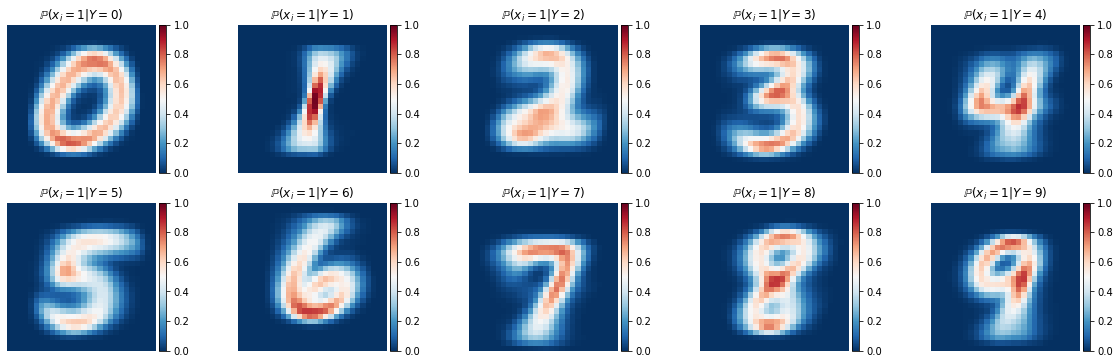

In [11]:
## visualize models
plt.figure(figsize=(20, 6))

for i in range(10):
    plt.subplot(2,5,i+1)
    show_image(ps[i], title='$\mathbb{P}'+f'(x_i = 1|Y={i})$', clim=(0, 1), colorbar=True, cmap=plt.cm.RdBu_r)

The image on the left shows the probabilities $\mathbb{P}(x_i = 1|Y=0)$ for each pixel. Dark red corresponds to a probability close to 1, dark blue corresponds to a probability close to 0, while white corresponds to a probability of 0.5.

### Let's classify a few training images

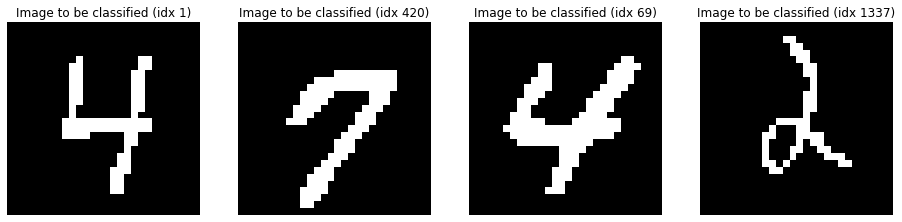

In [12]:
image_idxs_to_be_classified = [1, 420, 69, 1337]

plt.figure(figsize=(20, 4))
for plot_idx, image_idx in enumerate(image_idxs_to_be_classified):
    plt.subplot(1, 5, 1 + plot_idx)
    show_image(Xtrain[image_idx], title='Image to be classified (idx %d)' % image_idx)

The following function computes the likelihood of the image based on the vector of probabilities: p_digit. This means computing the product in eq. (3) above. However, the since probabilities are number between 0 and 1, the product of 784 probabilities can result in a very small number that causes numeric underflow. Therefore, for numeric stability, we will carry out the computations in the logarithmic domain.

In [13]:
def log_likelihood(x_new, p_digit):
    pixel_log_lik = x_new*np.log(p_digit + 1e-16) + (1-x_new)*np.log(1-p_digit)
    return np.sum(pixel_log_lik)

### Implementing Bayes's theorem

The function below computes and returns the probabilities: $\mathbb{P}(Y=0|\mathbf{x}^*)$ to $\mathbb{P}(Y=9|\mathbf{x}^*)$

In [14]:
def compute_posterior_prob(x_new):
    
    # compute log likelihood
    log_liks = [log_likelihood(x_new, ps[i]) for i in range(10)]
    # exponentiate
    liks = [np.exp(log_liks[i]) for i in range(10)]
    # implement eq. (4)
    terms = [liks[i]*priors[i] for i in range(10)]

    evidence = sum(terms)
    
    # implements eq. (1)
    post_probs = [terms[i]/evidence for i in range(10)]
    # returns P(Y=0|x) to P(Y=9|x)
    return post_probs

for image_idx in image_idxs_to_be_classified:
    x_new = Xtrain[image_idx]

    print('Image idx: %d' % image_idx)
    prob = compute_posterior_prob(x_new)
    print(f'p(Y={np.argmax(prob)} | x_new): {np.max(prob)}') 
    print('')

Image idx: 1
p(Y=4 | x_new): 0.9999999999998077

Image idx: 420
p(Y=7 | x_new): 0.9999999999990152

Image idx: 69
p(Y=4 | x_new): 1.0

Image idx: 1337
p(Y=2 | x_new): 0.9996180200699012



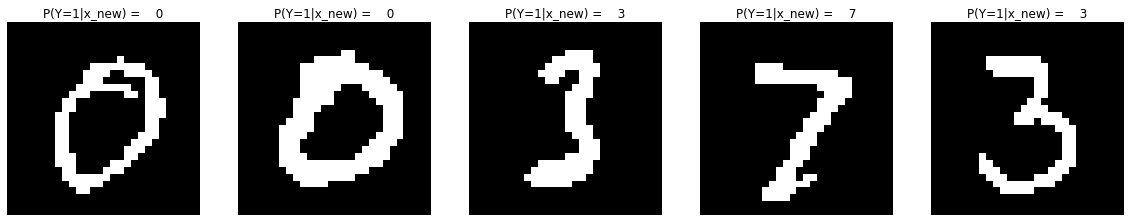

In [15]:
plt.figure(figsize=(20, 4))
for plot_idx, image_idx in enumerate([np.random.randint(7000) for _ in range(5)]):
    plt.subplot(1, 5, 1 + plot_idx)
    x_new = Xtrain[image_idx]
    p1 = np.argmax(compute_posterior_prob(x_new))
    show_image(Xtrain[image_idx], title='P(Y=1|x_new) = %4.f' % p1)

### A simple classification rule

We will use the following simple classification rule: 

The predicted number with the maximum posterior $\mathbb{P}\left(Y = i |  \textbf{X} =\textbf{x}^*\right)$ is classified as that number.


In [16]:
def classify(x):
    p = compute_posterior_prob(x)
    predicted_label = np.argmax(p)
    return predicted_label

### Let's test it on a bunch of digits

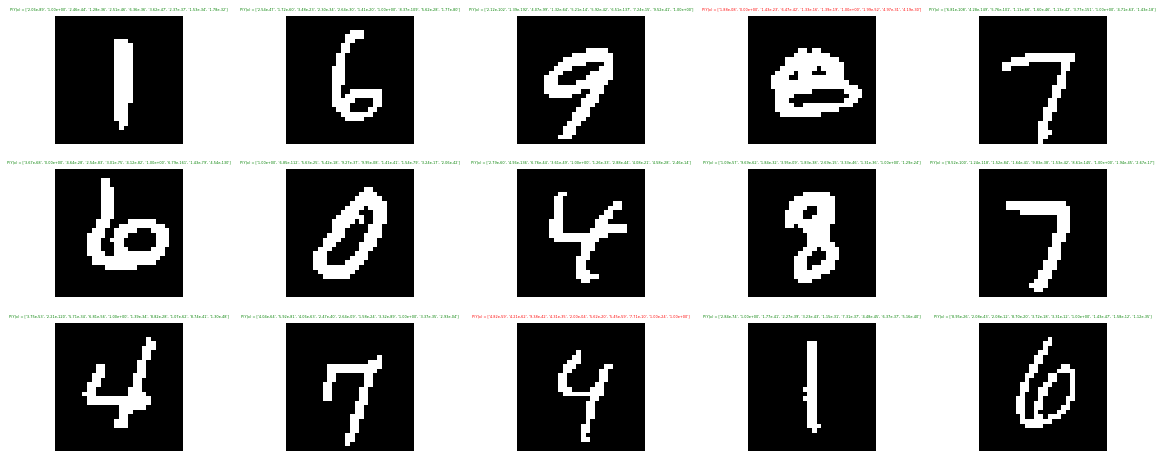

In [17]:
plt.figure(figsize=(20, 8))
for i in range(num_images):
    plt.subplot(num_rows, num_images_per_row, 1 + i)
    
    # compute posterior probabilities
    p = compute_posterior_prob(Xtest[i, :])
    p = ['{:.2e}'.format(elem) for elem in p]
    
    # get true label and predicted label
    true_label = ytest[i]
    predicted_label = classify(Xtest[i, :])
    
    # show image 
    show_image(Xtest[i, :])
    
    # if the classification is correct, use green otherwise use red 
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    
    plt.title(f"P(Y|x) = {p}", color=color, size=3.5)

### Let's compute the training and test errors

In [18]:
ytrain_hat = np.array([classify(x) for x in Xtrain])
ytest_hat = np.array([classify(x) for x in Xtest])

In [19]:
mean_train_acc = np.mean(ytrain_hat == ytrain)
mean_test_acc = np.mean(ytest_hat == ytest)
print('Training accuracy:\t%4.3f' % mean_train_acc)
print('Test accuracy:\t\t%4.3f' % mean_test_acc)

Training accuracy:	0.839
Test accuracy:		0.843


## 10-Fold Cross validation

Note that range of the training digits appear to not be changing, this is just because we aren't showing the full range. In the first fold, we leave out the first 10% in the next fold we leave out the range 10-20%, then 20-30% and so forth.

In [71]:
from sklearn.model_selection import KFold
cv = KFold(n_splits = 10)
cv.get_n_splits(X, y)

fold_train_accs = []
fold_test_accs = []
ytests, ytest_hats = [], []

i = 0
print("progress: \t Range of training digits \t Range of testing digits", end = "\n")
for train_i, test_i in cv.split(X,y):
    i += 1
    print(f"{i}/10, {train_i}, {test_i}", end = "\n")
    
    Xtrain, Xtest = X[train_i], X[test_i]
    ytrain, ytest = y[train_i], y[test_i]
    ytests += list(ytest)
    
    Xtrains = [Xtrain[ytrain == i, :] for i in range(10)]
    ps = [np.mean(Xtrains[i], axis=0) for i in range(10)]
    
    ytrain_hat = np.array([classify(x) for x in Xtrain])
    ytest_hat = np.array([classify(x) for x in Xtest])
    ytest_hats += list(ytest_hat)
    
    mean_train_acc = np.mean(ytrain_hat == ytrain)
    mean_test_acc = np.mean(ytest_hat == ytest)
    
    fold_train_accs.append(mean_train_acc)
    fold_test_accs.append(mean_test_acc)

progress: 	 Range of training digits 	 Range of testing digits
1/10, [ 7000  7001  7002 ... 69997 69998 69999], [   0    1    2 ... 6997 6998 6999]
2/10, [    0     1     2 ... 69997 69998 69999], [ 7000  7001  7002 ... 13997 13998 13999]
3/10, [    0     1     2 ... 69997 69998 69999], [14000 14001 14002 ... 20997 20998 20999]
4/10, [    0     1     2 ... 69997 69998 69999], [21000 21001 21002 ... 27997 27998 27999]
5/10, [    0     1     2 ... 69997 69998 69999], [28000 28001 28002 ... 34997 34998 34999]
6/10, [    0     1     2 ... 69997 69998 69999], [35000 35001 35002 ... 41997 41998 41999]
7/10, [    0     1     2 ... 69997 69998 69999], [42000 42001 42002 ... 48997 48998 48999]
8/10, [    0     1     2 ... 69997 69998 69999], [49000 49001 49002 ... 55997 55998 55999]
9/10, [    0     1     2 ... 69997 69998 69999], [56000 56001 56002 ... 62997 62998 62999]
10/10, [    0     1     2 ... 62997 62998 62999], [63000 63001 63002 ... 69997 69998 69999]


array([15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
       41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
       54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.,
       67., 68., 69., 70., 71., 72., 73., 74., 75., 77., 79.])

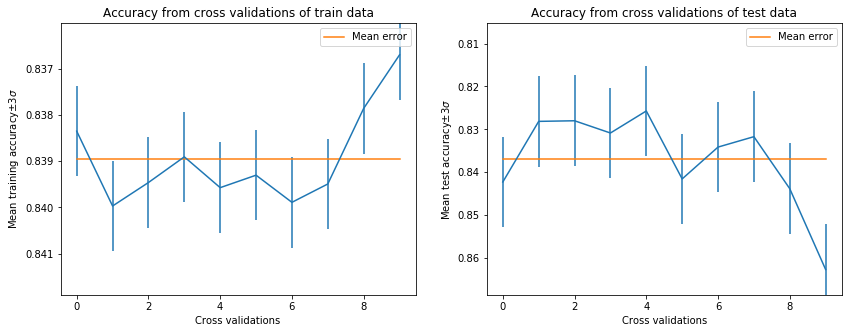

In [62]:
fig, axs = plt.subplots(1,2, figsize=(14,5))

std_train = np.std(fold_train_accs)
mean_train = np.mean(fold_train_accs)

axs[0].errorbar(x = range(10), 
             y = fold_train_accs,
             yerr = std_train)

axs[0].plot([np.mean(fold_train_accs)]*10, label = "Mean error")
axs[0].set_ylim(mean_train+3*std_train,mean_train-3*std_train)
axs[0].set_ylabel('Mean training accuracy$\pm3\sigma$')
axs[0].set_xlabel('Cross validations')
axs[0].set_title('Accuracy from cross validations of train data')
axs[0].legend()

std_test = np.std(fold_test_accs)
mean_test = np.mean(fold_test_accs)

axs[1].errorbar(x = range(10),
                y = fold_test_accs,
                yerr = std_test)

axs[1].plot([np.mean(fold_test_accs)]*10, label = "Mean error")
axs[1].set_ylim(mean_test+3*std_test, mean_test-3*std_test)
axs[1].set_ylabel('Mean test accuracy$\pm3\sigma$')
axs[1].set_xlabel('Cross validations')
axs[1].set_title('Accuracy from cross validations of test data')
axs[1].legend()

plt.show()

## Confusion matrix

Here the confusion matrix are shown for the last fold.

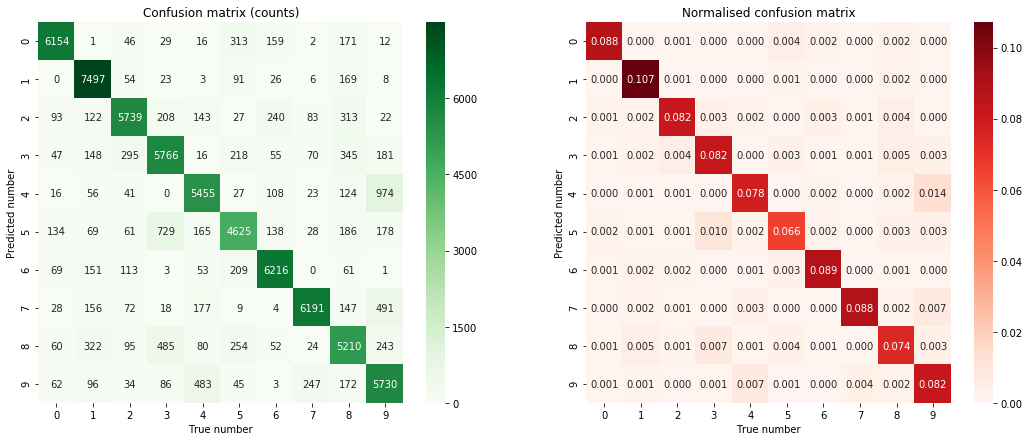

In [72]:
CM = confusion_matrix(ytests, ytest_hats)
xticklabels = [str(i) for i in range(10)]
plt.figure(figsize=(18, 7))
plt.subplot(121)
sns.heatmap(CM, xticklabels=xticklabels, yticklabels=xticklabels, annot=True, cmap="Greens", fmt='d')
plt.title('Confusion matrix (counts)')
plt.xlabel('True number')
plt.ylabel('Predicted number')

#normalised matrix
CM_normalized = CM / CM.sum()
plt.subplot(122)
plt.title('Normalised confusion matrix')
sns.heatmap(CM_normalized,xticklabels=xticklabels, yticklabels=xticklabels, annot=True,cmap="Reds",fmt=".3f")
plt.xlabel('True number')
plt.ylabel('Predicted number')
plt.show()

### Discussion of confusion matrix

The diagonal in the matrix shows all the correctly classified numbers these are quite high values, which is good. The other numbers correspond to the number of incorrectly classified numbers vs. the actual number. We can see that the classifier is having a bit of trouble 4's which is classifies as 9's, 5's as 3's and 8's as 3's.

## Error Analysis

Of the images that are misclassified by the system, are there common characteristics?, why?

In [23]:
incorrectID = np.zeros((len(Xtest), len(Xtest[0, :])))
true_label_list = []
predicted_label_list = []

j = 0

# create a matrix with all the incorrectly labeled digits
for i in range(len(Xtest)):
    true_label = ytest[i]
    predicted_label = classify(Xtest[i, :])
    if true_label != predicted_label:
        incorrectID[j, :] =  Xtest[i, :]
        true_label_list.append(true_label)
        predicted_label_list.append(predicted_label)
        j+=1
incorrectID = incorrectID[~np.all(incorrectID == 0, axis=1)]

Number of misclassified digits

In [24]:
print(np.size(incorrectID, axis=0))

961


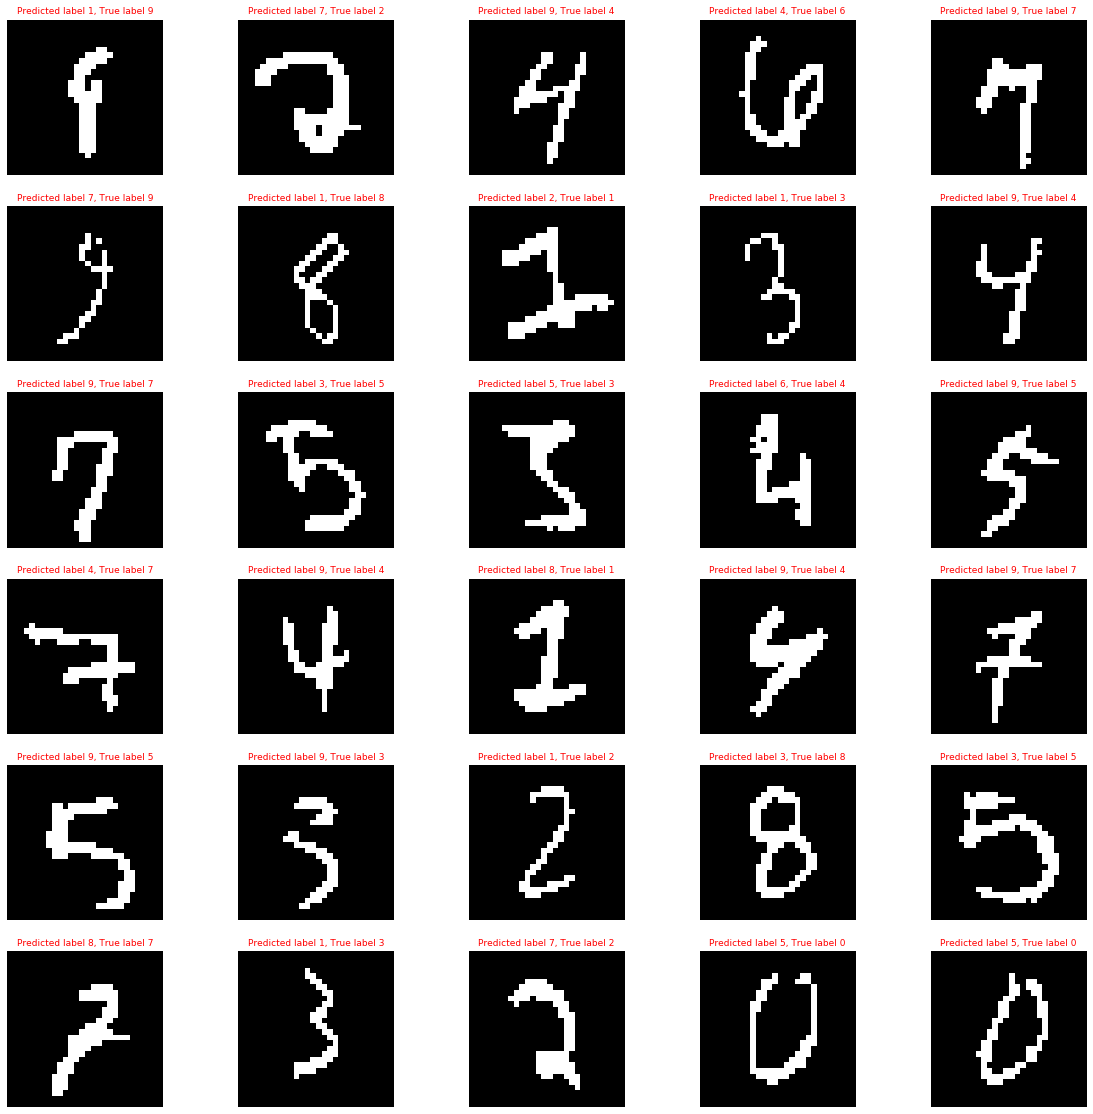

In [37]:
plt.figure(figsize=(20, 20)) 
for i in range(6*num_images_per_row):
    plt.subplot(6, num_images_per_row, 1 + i)

    # show image 
    show_image(incorrectID[i, :])
  
    plt.title(f"Predicted label {predicted_label_list[i]}, True label {true_label_list[i]}", color='red', size=9)

This is comparable to what we saw in the confusion matrix i.e. that 4's typically classifies as 9's, 5's as 3's and 8's as 3's. We can compare this to the heatmaps for the digits from earlier.

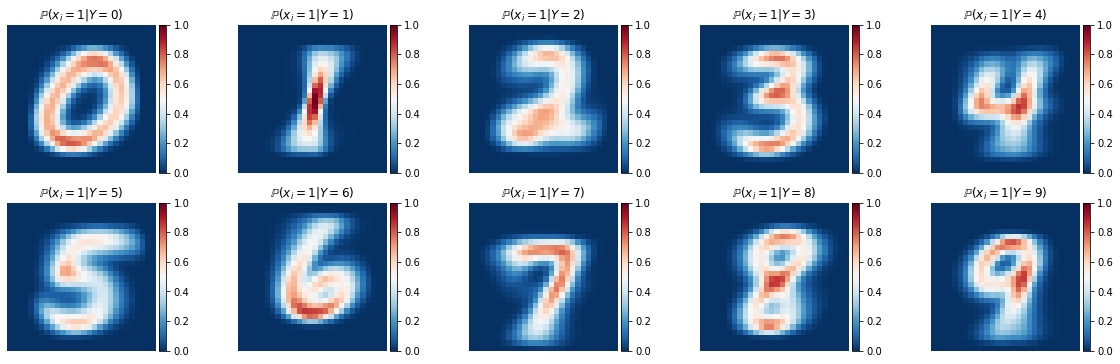

In [38]:
## visualize models
plt.figure(figsize=(20, 6))

for i in range(10):
    plt.subplot(2,5,i+1)
    show_image(ps[i], title='$\mathbb{P}'+f'(x_i = 1|Y={i})$', clim=(0, 1), colorbar=True, cmap=plt.cm.RdBu_r)

It's easy to see that the numbers which have a similar heatmap e.g. the 4's and 9's are more likely to be classified as each other, since they have more of the red area overlapping. The red area corresponds to probabilities that the classifier uses for classification.

Let's take a closer look at the classifier, looking at the second number shown.

In [39]:
print("Posteriors")
p = compute_posterior_prob(incorrectID[1, :])
print(p, "\n")
print("Digit the classifier thinks it is:", np.argmax(p))
print(f"Probability of being a {np.argmax(p)}:", max(p))

Posteriors
[3.347372731686788e-61, 3.273976029275544e-151, 0.0013512274936185753, 1.1854530364327868e-08, 4.08698689389102e-16, 1.9266894460917614e-68, 2.1711774944103977e-67, 0.9986487606518506, 2.5027106589001262e-18, 9.443963030204509e-24] 

Digit the classfier thinks it is: 7
Probability of being a 7: 0.9986487606518506


In other words: the classifier seems to be pretty sure of its classification even though it is wrong.

Lets try looking at the worst classified digits

In [41]:
po = [compute_posterior_prob(incorrectID[i, :]) for i in range(np.size(incorrectID, axis=0))]

In [42]:
true_label_list = np.array(true_label_list)
predicted_label_list = np.array(predicted_label_list)
po = np.array(po)
np.shape(po)

(961, 10)

In [79]:
arr1inds = np.argsort(po)
sorted_arr1 = incorrectID[arr1inds[::-1]]
sorted_arr2 = true_label_list[arr1inds[::-1]]
sorted_arr2 = predicted_label_list[arr1inds[::-1]]

ValueError: cannot reshape array of size 7840 into shape (28,28)

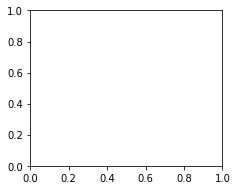

In [80]:
plt.figure(figsize=(20, 20)) 
for i in range(6*num_images_per_row):
    plt.subplot(6, num_images_per_row, 1 + i)

    # show image 
    show_image(sorted_arr1[i, :])
    
    plt.title(f"Predicted label {sorted_arr2[i]}, True label {sorted_arr3[i]}", color='red', size=9)

In [77]:
sorted_arr1[i, :].shape

(10, 784)